In [3]:
from rdkit import Chem
import pandas as pd

In [4]:
# load example reactants to filter
df = pd.read_csv('/Users/kate_fieseler/PycharmProjects/syndirella/syndirella/tests/reactants_filtering_w_labels/extra/JFMKOYDGTWISRQ-UHFFFAOYSA-N_Sp2-sp2_Suzuki_coupling_r2_1of2.csv', index_col=0)
df

,r2_smiles,r2_mol,r2_Sp2-sp2_Suzuki_coupling,r2_Sp2-sp2_Suzuki_coupling_num_matches,r1_Sp2-sp2_Suzuki_coupling,r2_lead_time
0,OB(O)c1cccc2cc[nH]c12,<rdkit.Chem.rdchem.Mol object at 0x29a7ca7b0>,True,1,False,1.0
1,Cn1ccc2cccc(B(O)O)c21,<rdkit.Chem.rdchem.Mol object at 0x29a7ca820>,True,1,False,1.0
2,Cc1ccc2ccn(C)c2c1B(O)O,<rdkit.Chem.rdchem.Mol object at 0x29a7ca890>,True,1,False,6.0
3,Cc1cc2cccc(B(O)O)c2[nH]1,<rdkit.Chem.rdchem.Mol object at 0x29a7ca900>,True,1,False,6.0
4,Cc1cc2cccc(B(O)O)c2n1C,<rdkit.Chem.rdchem.Mol object at 0x29a7ca970>,True,1,False,6.0
...,...,...,...,...,...,...
1320,CNCCc1[nH]c2c(B3OC(C)(C)C(C)(C)O3)cccc2c1C,<rdkit.Chem.rdchem.Mol object at 0x29a7dca50>,True,1,False,6.0
1321,CC(CC#N)c1cc2cccc(B3OC(C)(C)C(C)(C)O3)c2[nH]1,<rdkit.Chem.rdchem.Mol object at 0x29a7dcac0>,True,1,False,6.0
1322,CCSCc1cc2c(Cl)ccc(B3OC(C)(C)C(C)(C)O3)c2[nH]1,<rdkit.Chem.rdchem.Mol object at 0x29a7dcb30>,True,1,True,6.0
1323,CCOCc1cc2c(Cl)ccc(B3OC(C)(C)C(C)(C)O3)c2[nH]1,<rdkit.Chem.rdchem.Mol object at 0x29a7dcba0>,True,1,True,6.0


In [5]:
mols = [Chem.MolFromSmiles(smi) for smi in df['r2_smiles']]
mols

 ...]

In [6]:
Chem.MolToSmarts(mols[316])

'[#6]-[#6]1(-[#6])-[#8]-[#5](-[#6]2:[#6]:[#6](-[#17]):[#6]:[#6]3:[#6]:[#6]:[#7H]:[#6]:2:3)-[#8]-[#6]-1(-[#6])-[#6]'

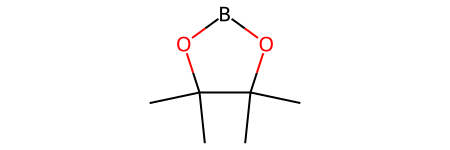

In [7]:
# keep cheap boronic acid reactants
boronic_acid_smarts = '[#6]-[#6]1(-[#6])-[#8]-[#5]-[#8]-[#6]-1(-[#6])-[#6]'
boronic_acid_mol = Chem.MolFromSmarts(boronic_acid_smarts)
boronic_acid_mol

In [8]:
# example filter out boronic acid reactants
boronic_acid = [mol.HasSubstructMatch(boronic_acid_mol) for mol in mols]
df['boronate_ester'] = boronic_acid
df

,r2_smiles,r2_mol,r2_Sp2-sp2_Suzuki_coupling,r2_Sp2-sp2_Suzuki_coupling_num_matches,r1_Sp2-sp2_Suzuki_coupling,r2_lead_time,boronate_ester
0,OB(O)c1cccc2cc[nH]c12,<rdkit.Chem.rdchem.Mol object at 0x29a7ca7b0>,True,1,False,1.0,False
1,Cn1ccc2cccc(B(O)O)c21,<rdkit.Chem.rdchem.Mol object at 0x29a7ca820>,True,1,False,1.0,False
2,Cc1ccc2ccn(C)c2c1B(O)O,<rdkit.Chem.rdchem.Mol object at 0x29a7ca890>,True,1,False,6.0,False
3,Cc1cc2cccc(B(O)O)c2[nH]1,<rdkit.Chem.rdchem.Mol object at 0x29a7ca900>,True,1,False,6.0,False
4,Cc1cc2cccc(B(O)O)c2n1C,<rdkit.Chem.rdchem.Mol object at 0x29a7ca970>,True,1,False,6.0,False
...,...,...,...,...,...,...,...
1320,CNCCc1[nH]c2c(B3OC(C)(C)C(C)(C)O3)cccc2c1C,<rdkit.Chem.rdchem.Mol object at 0x29a7dca50>,True,1,False,6.0,True
1321,CC(CC#N)c1cc2cccc(B3OC(C)(C)C(C)(C)O3)c2[nH]1,<rdkit.Chem.rdchem.Mol object at 0x29a7dcac0>,True,1,False,6.0,True
1322,CCSCc1cc2c(Cl)ccc(B3OC(C)(C)C(C)(C)O3)c2[nH]1,<rdkit.Chem.rdchem.Mol object at 0x29a7dcb30>,True,1,True,6.0,True
1323,CCOCc1cc2c(Cl)ccc(B3OC(C)(C)C(C)(C)O3)c2[nH]1,<rdkit.Chem.rdchem.Mol object at 0x29a7dcba0>,True,1,True,6.0,True


In [9]:
# show sample of failures
df[df['boronate_ester'] == True]

,r2_smiles,r2_mol,r2_Sp2-sp2_Suzuki_coupling,r2_Sp2-sp2_Suzuki_coupling_num_matches,r1_Sp2-sp2_Suzuki_coupling,r2_lead_time,boronate_ester
101,CC1(C)OB(c2cccc3cc[nH]c23)OC1(C)C,<rdkit.Chem.rdchem.Mol object at 0x29a7efc80>,True,1,False,1.0,True
200,Cn1ccc2cccc(B3OC(C)(C)C(C)(C)O3)c21,<rdkit.Chem.rdchem.Mol object at 0x29a7eb890>,True,1,False,1.0,True
201,CC1(C)OB(c2ccc(F)c3cc[nH]c23)OC1(C)C,<rdkit.Chem.rdchem.Mol object at 0x29a7eb900>,True,1,True,1.0,True
202,CC1(C)OB(c2cc(F)cc3cc[nH]c23)OC1(C)C,<rdkit.Chem.rdchem.Mol object at 0x29a7eb970>,True,1,True,1.0,True
203,CC1(C)OB(c2cc(I)cc3cc[nH]c23)OC1(C)C,<rdkit.Chem.rdchem.Mol object at 0x29a7eb9e0>,True,1,True,1.0,True
...,...,...,...,...,...,...,...
1320,CNCCc1[nH]c2c(B3OC(C)(C)C(C)(C)O3)cccc2c1C,<rdkit.Chem.rdchem.Mol object at 0x29a7dca50>,True,1,False,6.0,True
1321,CC(CC#N)c1cc2cccc(B3OC(C)(C)C(C)(C)O3)c2[nH]1,<rdkit.Chem.rdchem.Mol object at 0x29a7dcac0>,True,1,False,6.0,True
1322,CCSCc1cc2c(Cl)ccc(B3OC(C)(C)C(C)(C)O3)c2[nH]1,<rdkit.Chem.rdchem.Mol object at 0x29a7dcb30>,True,1,True,6.0,True
1323,CCOCc1cc2c(Cl)ccc(B3OC(C)(C)C(C)(C)O3)c2[nH]1,<rdkit.Chem.rdchem.Mol object at 0x29a7dcba0>,True,1,True,6.0,True


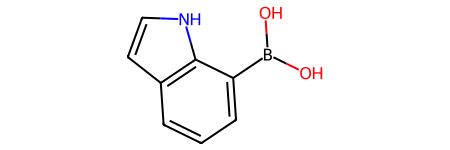

In [10]:
# test changing molecule to add boronate ester
mol = mols[0]
mol

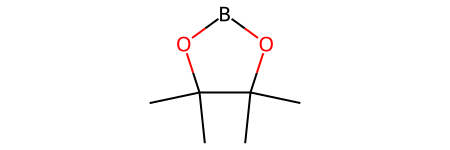

In [11]:
# build boronate ester that we want to add
boronate_ester = Chem.MolFromSmarts("[#6]-[#6]1(-[#6])-[#8]-[#5]-[#8]-[#6]-1(-[#6])-[#6]")
boronate_ester

In [12]:
# cut off the boronic acid by finding boron atom and breaking bond?
# you'd find the boron atoms present, find which atom ID corresponds to the correct boron atom, and then break the bond
boron_atom_ids = []
for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 5:  # Atomic number 5 corresponds to Boron
        boron_atom_ids.append(atom.GetIdx())
boron_atom_ids

[1]

In [13]:
# which bond to break?
boron_atom_ids_with_non_oxygen_neighbor = []
for bond in mol.GetBonds():
    atom1 = bond.GetBeginAtom()
    atom2 = bond.GetEndAtom()
    if atom1.GetAtomicNum() == 5 and atom2.GetAtomicNum() != 8:  
        boron_atom_ids_with_non_oxygen_neighbor.append([atom1.GetIdx(), atom2.GetIdx()])
    elif atom1.GetAtomicNum() != 8 and atom2.GetAtomicNum() == 5:  
        boron_atom_ids_with_non_oxygen_neighbor.append([atom1.GetIdx(), atom2.GetIdx()])
boron_atom_ids_with_non_oxygen_neighbor

[[1, 3]]

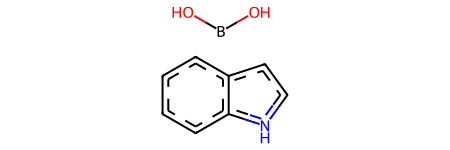

In [14]:
editable_mol = Chem.RWMol(mol)  # Create a mutable copy of the molecule
editable_mol.RemoveBond(boron_atom_ids_with_non_oxygen_neighbor[0][0], boron_atom_ids_with_non_oxygen_neighbor[0][1])
# remove 
editable_mol.GetMol()

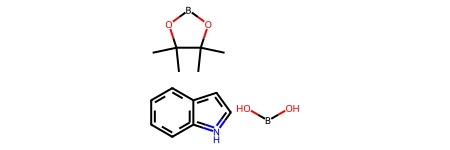

In [15]:
# combine 
combo = Chem.CombineMols(editable_mol.GetMol(), boronate_ester)
combo

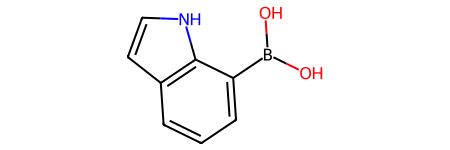

In [16]:
# Use replace substructs
mol

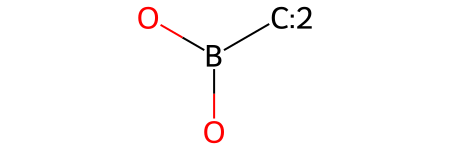

In [17]:
# get mol of what to replace
replace = Chem.MolFromSmarts("[#6X3:2]-[#5](-[#8])(-[#8])")
replace

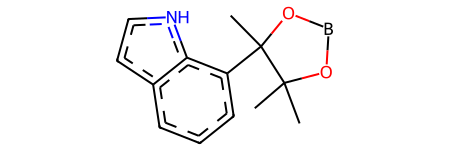

In [18]:
mod_mol = Chem.ReplaceSubstructs(mol, replace, boronate_ester)
mod_mol[0]

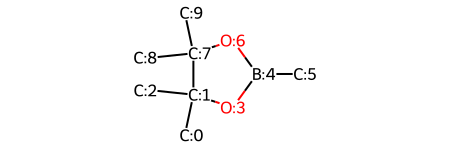

In [19]:
# label atom ids in boronate ester
boronate_ester = Chem.MolFromSmarts("[#6:1]-[#6:2]1(-[#6])-[#8]-[#5](-[#6])-[#8]-[#6]-1(-[#6])-[#6]")
for i, atom in enumerate(boronate_ester.GetAtoms()):
    # For each atom, set the property "molAtomMapNumber" to a custom number, let's say, the index of the atom in the molecule
    atom_index = atom.GetIdx()
    atom.SetProp("molAtomMapNumber", str(atom_index))
boronate_ester

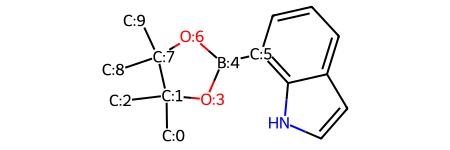

In [20]:
mod_mol = Chem.ReplaceSubstructs(mol, replace, boronate_ester, replacementConnectionPoint=5, replaceAll=True)
mod_mol[0]

In [21]:
# test bromine halogen replacement
df = pd.read_csv('/Users/kate_fieseler/PycharmProjects/syndirella/syndirella/tests/reactants_filtering_w_labels/extra/JFMKOYDGTWISRQ-UHFFFAOYSA-N_Sp2-sp2_Suzuki_coupling_r1_1of2.csv', index_col=0)
df

,r1_smiles,r1_mol,r1_Sp2-sp2_Suzuki_coupling,r1_Sp2-sp2_Suzuki_coupling_num_matches,r2_Sp2-sp2_Suzuki_coupling,r1_lead_time
0,Ic1cccc(I)n1,<rdkit.Chem.rdchem.Mol object at 0x29a748e40>,True,2,False,1.0
1,Oc1ccc(I)nc1I,<rdkit.Chem.rdchem.Mol object at 0x29a748eb0>,True,2,False,1.0
2,Nc1cc(I)nc(I)c1,<rdkit.Chem.rdchem.Mol object at 0x29a748f20>,True,2,False,6.0
3,Ic1cc(I)nc(I)c1,<rdkit.Chem.rdchem.Mol object at 0x29a748f90>,True,3,False,6.0
4,Cc1cc(I)nc(I)c1,<rdkit.Chem.rdchem.Mol object at 0x29a755040>,True,2,False,6.0
...,...,...,...,...,...,...
205,O=C(Cl)c1cc(I)nc(I)c1OC(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x29a789970>,True,3,False,6.0
206,Oc1cc(Cc2ccccc2)c(I)nc1I,<rdkit.Chem.rdchem.Mol object at 0x29a7899e0>,True,2,False,6.0
207,O=S(=O)(Cl)c1c(OC(F)(F)F)cc(I)nc1I,<rdkit.Chem.rdchem.Mol object at 0x29a789a50>,True,2,False,6.0
208,O=S(=O)(Cl)c1cc(I)nc(I)c1OC(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x29a789ac0>,True,2,False,6.0


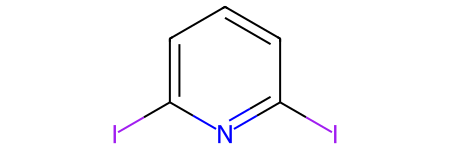

In [22]:
mols = [Chem.MolFromSmiles(smi) for smi in df['r1_smiles']]
mol = mols[0]
mol

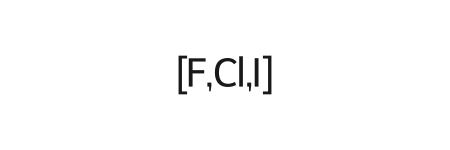

In [23]:
replace = Chem.MolFromSmarts("[#9,#17,#53]")
replace

In [24]:
bromine = Chem.MolFromSmarts("[#35]")

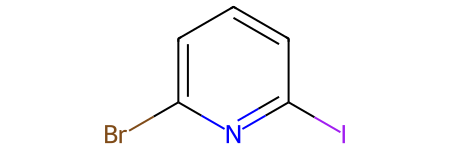

In [25]:
mod_mol = Chem.ReplaceSubstructs(mol, replace, bromine, replacementConnectionPoint=0)
mod_mol[0]

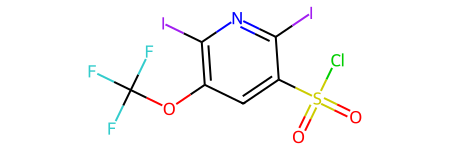

In [26]:
mols[209]

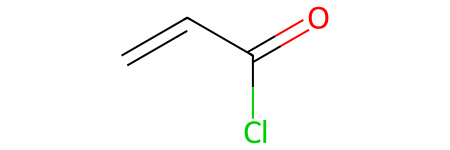

In [27]:
# replace acyl chloride with carboxyl for amidation
mol = Chem.MolFromSmiles('C=CC(=O)Cl')
mol

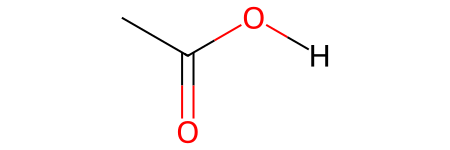

In [34]:
add = Chem.MolFromSmarts('[#6]-[#6](=[#8])-[#8](-[#1])')
add

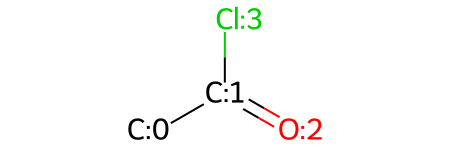

In [39]:
to_replace = Chem.MolFromSmarts('[#6]-[#6](=[#8])-[#17]')

for i, atom in enumerate(to_replace.GetAtoms()):
    # For each atom, set the property "molAtomMapNumber" to a custom number, let's say, the index of the atom in the molecule
    atom_index = atom.GetIdx()
    atom.SetProp("molAtomMapNumber", str(atom_index))
to_replace

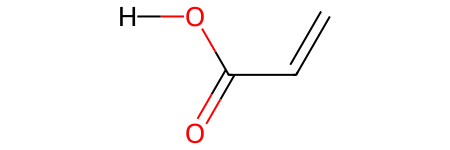

In [40]:
mod_mol = Chem.ReplaceSubstructs(mol, to_replace, add, replacementConnectionPoint=0)
mod_mol[0]